# Unsupervised Machine Learning

### Myopia Clusters

In [1]:
# Setup 

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

### Part 1: Prepare the Data

In [3]:
#get the data in

file_path = Path("myopia.csv")


In [4]:
df_myopia = pd.read_csv(file_path)


df_myopia.head

<bound method NDFrame.head of      AGE  SPHEQ         AL    ACD     LT    VCD  SPORTHR  READHR  COMPHR  \
0      6 -0.052  21.889999  3.690  3.498  14.70       45       8       0   
1      6  0.608  22.379999  3.702  3.392  15.29        4       0       1   
2      6  1.179  22.490000  3.462  3.514  15.52       14       0       2   
3      6  0.525  22.200001  3.862  3.612  14.73       18      11       0   
4      5  0.697  23.290001  3.676  3.454  16.16       14       0       0   
..   ...    ...        ...    ...    ...    ...      ...     ...     ...   
613    6  0.678  22.400000  3.663  3.803  14.93        2       0       7   
614    6  0.665  22.500000  3.570  3.378  15.56        6       0       1   
615    6  1.834  22.940001  3.624  3.424  15.89        8       0       0   
616    6  0.665  21.920000  3.688  3.598  14.64       12       2       1   
617    6  0.802  22.260000  3.530  3.484  15.25       25       0       2   

     STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  MYOPIC  
0  

In [5]:
y = df_myopia["MYOPIC"]

In [6]:
df_myopia.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [7]:
# Remove the "MYOPIC" column

df_myopia.drop(columns="MYOPIC")
df_myopia.head()
X = df_myopia
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# more clean up and standardize

X_train_scaled = StandardScaler().fit_transform(X_train)

print(X_train_scaled)

[[-0.43023352  0.07947417  0.12721455 ... -1.03293963 -1.02848324
  -0.3968627 ]
 [-0.43023352 -0.21591996  0.19909874 ... -1.03293963  0.97230559
   2.51976315]
 [-0.43023352  0.29024183 -0.62036443 ...  0.96811079 -1.02848324
  -0.3968627 ]
 ...
 [-0.43023352  0.58084585  0.78853529 ... -1.03293963  0.97230559
  -0.3968627 ]
 [ 2.24356676  0.25830736 -0.34721005 ... -1.03293963 -1.02848324
  -0.3968627 ]
 [-0.43023352 -0.25903156  0.17034506 ... -1.03293963  0.97230559
  -0.3968627 ]]


In [9]:
df_myopia.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


### Part 2: Apply Dimensionality Reduction

In [10]:
# Parameters for pipeline components use PCA


pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_train_scaled)

print(X_pca)

[[-1.4706094  -0.51699917 -0.90444557 ...  0.84927992  0.68415585
  -0.93074863]
 [ 0.37344181 -0.41611066  1.6964696  ...  0.54707383 -1.27933867
   0.91938611]
 [-0.85445321 -0.7736161  -0.49072269 ...  0.06114395 -1.24471388
   0.56243518]
 ...
 [ 0.15979693 -1.17821117 -0.71339446 ... -0.34452883 -0.10479044
  -0.29573594]
 [ 0.1893729   1.04071912 -0.89375906 ...  1.05362118 -0.54872391
  -0.9032478 ]
 [ 1.71909203  1.10232941 -0.31167813 ...  0.2578696   0.43779945
   0.55220541]]


In [11]:
X_pca_df = pd.DataFrame(data=X_pca)

X_pca_df

,0,1,2,3,4,5,6,7,8,9,10
0,-1.470609,-0.516999,-0.904446,0.339972,0.247123,-0.071320,1.158642,0.196826,0.849280,0.684156,-0.930749
1,0.373442,-0.416111,1.696470,0.248920,-1.507491,0.649324,1.396180,0.359012,0.547074,-1.279339,0.919386
2,-0.854453,-0.773616,-0.490723,-0.018285,0.755114,-0.844266,-0.559820,0.339795,0.061144,-1.244714,0.562435
3,-0.003933,-1.127897,1.926204,-0.122980,-1.755488,0.392115,-0.225182,0.167036,1.573121,0.487837,0.695871
4,0.788565,-0.140129,-1.305767,-1.659821,0.496212,-0.286269,-0.647078,-2.261079,1.674126,-0.475841,-0.745433
...,...,...,...,...,...,...,...,...,...,...,...
458,3.227027,-2.170435,-0.228739,-1.533594,0.346633,-0.764489,1.711666,-2.236088,-1.702390,1.287386,0.006912
459,-2.281457,0.585436,-0.993194,-0.958290,0.079808,-0.247565,1.061068,0.731602,0.308999,0.173666,-0.229795
460,0.159797,-1.178211,-0.713394,-0.394624,-1.048055,1.306461,-0.114533,0.503591,-0.344529,-0.104790,-0.295736
461,0.189373,1.040719,-0.893759,-0.506122,1.075191,-0.006225,1.244101,-2.131083,1.053621,-0.548724,-0.903248


In [12]:
pca.explained_variance_ratio_


array([0.20659722, 0.14490365, 0.10015091, 0.08479959, 0.07041102,
       0.06786462, 0.06229149, 0.05970251, 0.04972101, 0.0466734 ,
       0.04155493])

##### we went from 618 rows x 15 col -> 463 rows x 11 col

In [13]:
tsne = TSNE(learning_rate=35)

tsne_features = tsne.fit_transform(X_pca_df)

In [14]:
tsne_features.shape

(463, 2)

In [15]:
# The first column of transformed features
X_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
X_pca_df['z'] = tsne_features[:,1]

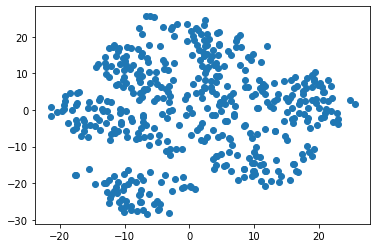

In [16]:
#Scatter plot

plt.scatter(X_pca_df['x'], X_pca_df['z'])
plt.show()

In [17]:
y.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [18]:
#plt.scatter(X_pca_df['x'], X_pca_df['z'], c=y)
#plt.show()

There appear to be 5-6 clusters.

### Part 3: Perform a Cluster Analysis with K-means

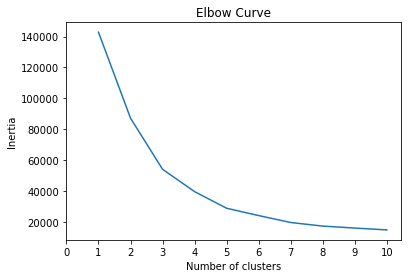

In [19]:
from sklearn.cluster import KMeans
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()